In [63]:
## import data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime

%matplotlib inline

df = pd.read_csv('2013_movies.csv')

**Challenge 1**

In [53]:
# sort by date
df2 = (df
 .sort_values(by='ReleaseDate')
)

In [54]:
df2[['ReleaseDate']] = pd.to_datetime(df2['ReleaseDate'])

In [55]:
df2['DomesticTotalGross ($M)'] = df2['DomesticTotalGross'] / 10**6

In [9]:
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DomesticTotalGross ($M)
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,34.341945
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,40.041683
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,46.000903
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,71.628180
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,55.703475


**Challenge 2**

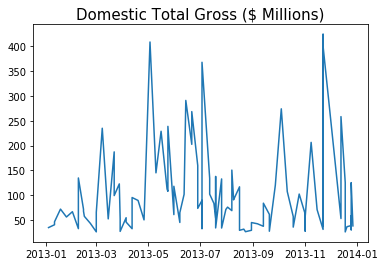

In [70]:
# plot the graphs
fig, ax = plt.subplots()
ax.plot(df2['ReleaseDate'], df2['DomesticTotalGross ($M)']);
plt.title('Domestic Total Gross ($ Millions)', fontsize = 15);

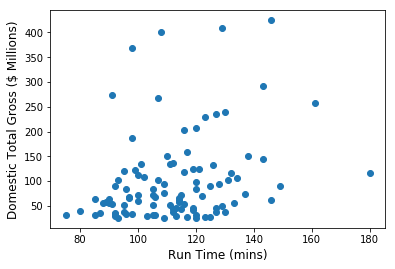

In [71]:
fig, ax = plt.subplots()
ax.scatter(df2['Runtime'], df2['DomesticTotalGross ($M)']);
plt.xlabel('Run Time (mins)', fontsize=12);
plt.ylabel('Domestic Total Gross ($ Millions)', fontsize=12);

**Challenge 3**

In [12]:
# group by ratings
df3 = (df2
.groupby(by=['Rating'])
.mean()
.reset_index()
)

In [13]:
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DomesticTotalGross ($M)
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,34.341945
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,40.041683
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,46.000903
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,71.628180
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,55.703475


**Challenge 4**

In [15]:
## define the subplot format
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

# 4 different kinds of ratings
Ratings = ['G', 'PG', 'PG-13', 'R']

# axes[0, 0].scatter(df_temp['ReleaseDate'], df_temp['DomesticTotalGross'])
for i in range(2):
    for j in range(2):
        df_temp = df2[df2['Rating'] == Ratings[2*i+j]]
        axes[i, j].plot(df_temp['ReleaseDate'], df_temp['DomesticTotalGross ($M)']);

axes[0, 0].set(ylabel = 'DomesticTotalGross');
axes[1, 0].set(ylabel = 'DomesticTotalGross');
for tick in axes[1, 0].get_xticklabels():
    tick.set_rotation(45)
    
for tick in axes[1, 1].get_xticklabels():
    tick.set_rotation(45)
    
    

**Challenge 5**

In [16]:
## info with the largest total gross
df2.loc[df2['DomesticTotalGross'].idxmax()]
# The director is Francis Lawrence

Title                      The Hunger Games: Catching Fire
Budget                                             1.3e+08
DomesticTotalGross                               424668047
Director                                  Francis Lawrence
Rating                                               PG-13
Runtime                                                146
ReleaseDate                            2013-11-22 00:00:00
DomesticTotalGross ($M)                            424.668
Name: 0, dtype: object

**Challenge 6**

In [56]:
# extract months from the ReleaseDate column
df2['Month'] = df2['ReleaseDate'].apply(lambda x: x.date().month)

# group the data by months
df_month = (df2
 .groupby('Month')
 .mean()
 .reset_index()
 [['Month', 'DomesticTotalGross ($M)']]
)



AttributeError: module 'matplotlib' has no attribute 'plot'

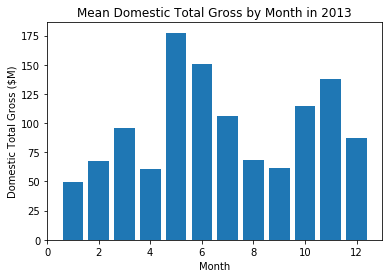

In [69]:
plt.bar(df_month['Month'], df_month['DomesticTotalGross ($M)']);
plt.title('Mean Domestic Total Gross by Month in 2013');
plt.ylabel('Domestic Total Gross ($M)');
plt.xlabel('Month');